In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download(['punkt', 'wordnet'])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
# Read a table of fixed-width formatted lines into DataFrame.
df = pd.read_fwf('text_to_cluster.txt',header=None,names=['Text_data']) 

In [83]:
print(df)

                                             Text_data
0    Ransomware attack at Mexico's Pemex halts work...
1    #city | #ransomware | Ransomware Attack At Mex...
2    Mexico's Pemex Oil Suffers Ransomware Attack, ...
3    A Mexican oil company was hit by ransomware at...
4                    Pemex Struck by Ransomware Attack
..                                                 ...
679             Detecting and Responding to Ransomware
680   Emotet malware is back, more dangerous than ever
681  Hosting provider SmarterASP.NET hit by ransomw...
682  Ransomware as a Service (RaaS) – A Contemporar...
683  Ransomware as a Service (RaaS) – A Contemporar...

[684 rows x 1 columns]


In [84]:
df['Text_data'][1]

'#city | #ransomware | Ransomware Attack At Mexico’s Pemex Halts Work, Threatens To Cripple Computers'

In [85]:
df = pd.DataFrame(df)

In [86]:
df

,Text_data
0,Ransomware attack at Mexico's Pemex halts work...
1,#city | #ransomware | Ransomware Attack At Mex...
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ..."
3,A Mexican oil company was hit by ransomware at...
4,Pemex Struck by Ransomware Attack
...,...
679,Detecting and Responding to Ransomware
680,"Emotet malware is back, more dangerous than ever"
681,Hosting provider SmarterASP.NET hit by ransomw...
682,Ransomware as a Service (RaaS) – A Contemporar...


In [87]:
import nltk
from nltk.corpus import stopwords

In [88]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # Remove links
    text = re.sub(r"http\S+", "", text)
    
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        
        # 3. join back together
        text = " ".join(tokens)
        
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text


In [89]:
df['Cleaned_Data'] = df['Text_data'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df

,Text_data,Cleaned_Data
0,Ransomware attack at Mexico's Pemex halts work...,ransomware attack mexico pemex halts work thre...
1,#city | #ransomware | Ransomware Attack At Mex...,city ransomware ransomware attack mexico pemex...
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ...",mexico pemex oil suffers ransomware attack mil...
3,A Mexican oil company was hit by ransomware at...,mexican oil company hit ransomware attack
4,Pemex Struck by Ransomware Attack,pemex struck ransomware attack
...,...,...
679,Detecting and Responding to Ransomware,detecting responding ransomware
680,"Emotet malware is back, more dangerous than ever",emotet malware back dangerous ever
681,Hosting provider SmarterASP.NET hit by ransomw...,hosting provider smarterasp net hit ransomware...
682,Ransomware as a Service (RaaS) – A Contemporar...,ransomware service raas contemporary mal du si...


Tf is “n” (natural) by default, “l” (logarithmic) when sublinear_tf=True.

max_df and min_df is used for removing terms that appear too frequently

min_df = 5 means "ignore terms that appear in less than 5 documents".

max_df = 0.95 means "ignore terms that appear in more than 95% of the documents


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['Cleaned_Data']).toarray()
X = X.reshape(-1,1)

In [91]:
X

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

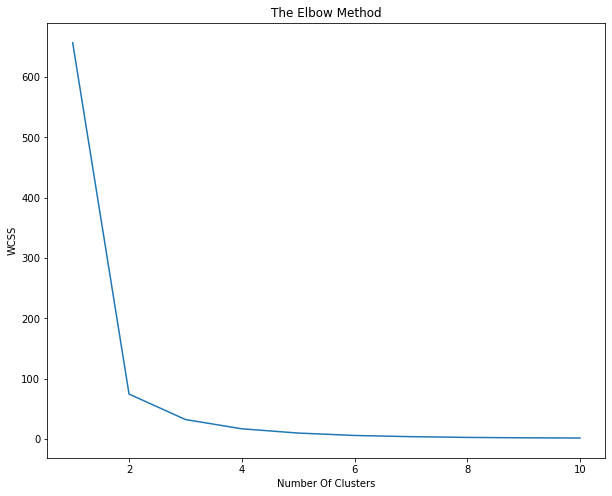

In [92]:
#finding optimal number of clusters using the elbow method  

from sklearn.cluster import KMeans  
fig = plt.figure(figsize=(10,8)) 

WCSS = []   # Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    WCSS.append(clf.inertia_) #inertia is another name for WCSS
    
plt.plot(range(1, 11), WCSS)  
plt.title('The Elbow Method')  
plt.ylabel('WCSS')
plt.xlabel('Number Of Clusters') 
plt.show()  


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# initialize the vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = tfidf.fit_transform(df['Cleaned_Data'])

In [95]:

from sklearn.cluster import KMeans

# initialize kmeans with 2 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [96]:
df['Cleaned_Data'][1]

'city ransomware ransomware attack mexico pemex halts work threatens cripple computers'

In [99]:
kmeans.predict

<bound method _BaseKMeans.predict of KMeans(n_clusters=5, random_state=42)>

In [100]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [102]:
# assign clusters and pca vectors to our dataframe 
df['Cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [103]:
df

,Text_data,Cleaned_Data,Cluster,x0,x1
0,Ransomware attack at Mexico's Pemex halts work...,ransomware attack mexico pemex halts work thre...,2,-0.039890,-0.187519
1,#city | #ransomware | Ransomware Attack At Mex...,city ransomware ransomware attack mexico pemex...,2,-0.061704,-0.213003
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ...",mexico pemex oil suffers ransomware attack mil...,2,-0.029841,-0.216264
3,A Mexican oil company was hit by ransomware at...,mexican oil company hit ransomware attack,2,0.031500,-0.322368
4,Pemex Struck by Ransomware Attack,pemex struck ransomware attack,2,0.020250,-0.356376
...,...,...,...,...,...
679,Detecting and Responding to Ransomware,detecting responding ransomware,3,-0.221532,-0.410843
680,"Emotet malware is back, more dangerous than ever",emotet malware back dangerous ever,1,-0.112642,0.056622
681,Hosting provider SmarterASP.NET hit by ransomw...,hosting provider smarterasp net hit ransomware...,3,0.026993,-0.407248
682,Ransomware as a Service (RaaS) – A Contemporar...,ransomware service raas contemporary mal du si...,3,-0.096037,-0.057378


In [104]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
social,another,one,capital,chief,facebook,business,purcellville,data,breach

Cluster 1
threat,bluekeep,emotet,users,cybersecurity,cve,security,attacks,phishing,malware

Cluster 2
hit,state,mexico,mass,mexican,oil,ransomware,ddos,pemex,attack

Cluster 3
attack,windows,buran,service,provider,hosting,smarterasp,new,net,ransomware

Cluster 4
election,hit,sophisticated,uk,large,scale,attack,cyber,party,labour


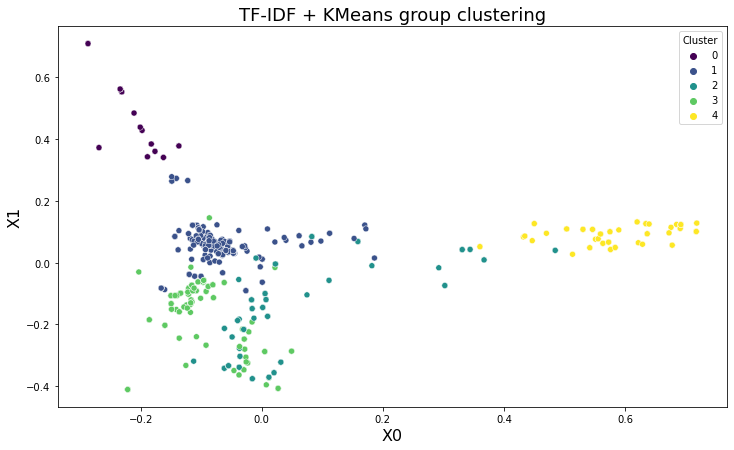

In [105]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans group clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='Cluster', palette="viridis")
plt.show()

In [106]:
df

,Text_data,Cleaned_Data,Cluster,x0,x1
0,Ransomware attack at Mexico's Pemex halts work...,ransomware attack mexico pemex halts work thre...,2,-0.039890,-0.187519
1,#city | #ransomware | Ransomware Attack At Mex...,city ransomware ransomware attack mexico pemex...,2,-0.061704,-0.213003
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ...",mexico pemex oil suffers ransomware attack mil...,2,-0.029841,-0.216264
3,A Mexican oil company was hit by ransomware at...,mexican oil company hit ransomware attack,2,0.031500,-0.322368
4,Pemex Struck by Ransomware Attack,pemex struck ransomware attack,2,0.020250,-0.356376
...,...,...,...,...,...
679,Detecting and Responding to Ransomware,detecting responding ransomware,3,-0.221532,-0.410843
680,"Emotet malware is back, more dangerous than ever",emotet malware back dangerous ever,1,-0.112642,0.056622
681,Hosting provider SmarterASP.NET hit by ransomw...,hosting provider smarterasp net hit ransomware...,3,0.026993,-0.407248
682,Ransomware as a Service (RaaS) – A Contemporar...,ransomware service raas contemporary mal du si...,3,-0.096037,-0.057378


In [107]:
import sklearn
sklearn.metrics.silhouette_score(X, clusters)

0.08679593558933868